In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../datasets/celeba/attributes/attr_celeba.csv').replace({-1:0})[['filename', 'Eyeglasses', 'Smiling', 'Wearing_Lipstick', 'No_Beard', 'Young']]
df.head()

,filename,Eyeglasses,Smiling,Wearing_Lipstick,No_Beard,Young
0,000001.png,0,1,1,1,1
1,000002.png,0,1,0,1,1
2,000003.png,0,0,0,1,1
3,000004.png,0,0,1,1,1
4,000005.png,0,0,1,1,1


In [3]:
images = []
for i in tqdm(range(df.shape[0])[:2**14]):
    img = image.load_img('../datasets/celeba/img_align_celeba_png/' + df['filename'][i], target_size=(128,128))
    img = image.img_to_array(img)
    img = img/255
    images.append(img)

X = np.stack(images, axis=0)

100%|██████████| 16384/16384 [00:26<00:00, 624.59it/s]


In [4]:
X.shape

(16384, 128, 128, 3)

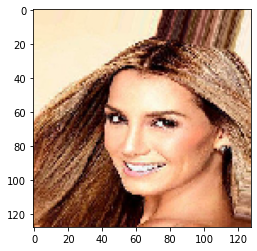

In [5]:
plt.imshow(X[0])

In [6]:
y = np.array(df.drop(['filename'], axis=1))[:2**14]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)       

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Train on 14745 samples, validate on 1639 samples
Epoch 1/20
14745/14745 [==============================] - 7s 461us/step - loss: 0.2271 - accuracy: 0.9073 - val_loss: 0.2072 - val_accuracy: 0.9117
Epoch 2/20
14745/14745 [==============================] - 7s 455us/step - loss: 0.2246 - accuracy: 0.9093 - val_loss: 0.2056 - val_accuracy: 0.9134
Epoch 3/20
14745/14745 [==============================] - 7s 447us/step - loss: 0.2244 - accuracy: 0.9081 - val_loss: 0.2087 - val_accuracy: 0.9130
Epoch 4/20
14745/14745 [==============================] - 7s 446us/step - loss: 0.2254 - accuracy: 0.9088 - val_loss: 0.2045 - val_accuracy: 0.9146
Epoch 5/20
14745/14745 [==============================] - 7s 449us/step - loss: 0.2198 - accuracy: 0.9114 - val_loss: 0.2215 - val_accuracy: 0.9085
Epoch 6/20
14745/14745 [==============================] - 7s 446us/step - loss: 0.2182 - accuracy: 0.9121 - val_loss: 0.2156 - val_accuracy: 0.9070
Epoch 7/20
14745/14745 [==============================] - 7s 44

In [26]:
values = model.predict(X_test)

In [30]:
for i, val in enumerate(values[1]):
    print('{} - {:f}'.format( df.columns[1:][i], val))

Eyeglasses - 0.000032
Smiling - 0.957089
Wearing_Lipstick - 0.000000
No_Beard - 0.012015
Young - 0.747491


In [31]:
for i, val in enumerate(y_test[1]):
    print('{} - {:f}'.format( df.columns[1:][i], val))

Eyeglasses - 0.000000
Smiling - 1.000000
Wearing_Lipstick - 0.000000
No_Beard - 0.000000
Young - 1.000000


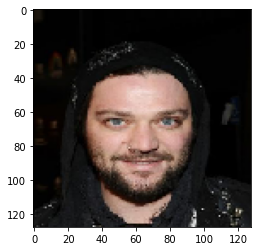

In [32]:
plt.imshow(X_test[1])

In [33]:
model.save('acc91_Eyeglasses_Smiling_Wearing_Lipstick_No_Beard_Young')